# Objective 
* Get clear with the transformation

* Visualise the effect of PCA
    * From original image of dimension 28x28 -> 10x10 ---(recover)---> 28x28
    
* What is the meaning in the reduced space? Why the amplitude of the first dimension is larger than the other? 
    * The first dimension contains the largest variation. 

* What if PCA is applied on the one type of label only --> I think it can remain the same "explain-ability" with lesser encoding. 

* Inside the method PCA there must be something faster than SVD (because SVD takes much longer time than PCA). 

* Can we use t-SNE representation in some ways here? Projecting PCA in 2-D spaces could render something like number 1 locating close to each other. 

* When the reconstruction is lossy - where is the "new" that are added to the missing - and become the image space again?

* Check the R code again because this has something interesting with different scales among columns: https://dinh-hung-tu.github.io/rmd/ch10.html?/

* Why the matrix multiplication is lossy - it seems that we can recover with a matrix inverse?

### TensorFlow way of loading MNIST

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/data/mnist")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /data/mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /data/mnist/train-labels-idx1-ubyte.gz
Extracting /data/mnist/t10k-images-idx3-ubyte.gz
Extracting /data/mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
num_samples = mnist.train.num_examples
num_samples

55000

In [3]:
def plot_image(vector):
    assert len(vector)==784 
    plt.imshow(np.reshape(vector, [28, 28]))
    plt.show()

In [19]:
NUM_COMPONENTS = 100
pca = PCA(n_components=NUM_COMPONENTS)
X_origin = mnist.train.images
X_reduced = pca.fit_transform(X_origin)
print("Dimension of reduced representation", X_reduced.shape)
X_recovered = pca.inverse_transform(X_reduced)

Dimension of reduced representation (55000, 100)


In [5]:
## Testing with SVD
# X_centered = X_origin - X_origin.mean(axis=0)
# U, s, V = np.linalg.svd(X_centered)
# c1 = V.T[:,0]
# c2 = V.T[:,1]

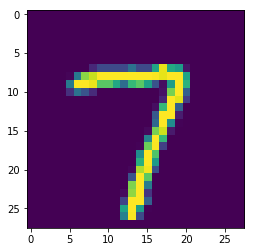

In [6]:
plot_image(mnist.train.images[100])

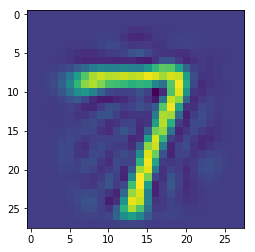

In [7]:
plot_image(X_recovered[100])

### Inspect a compressed vector

We can observe a particular vector, and see a reduction in the amplitude of the components 

Text(0.5, 1.0, 'Examine the reduced representation of vector 30-th')

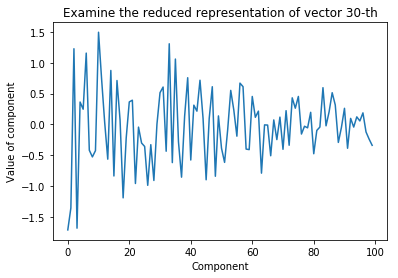

In [14]:
EXAMPLE_ID = 30
plt.plot(X_reduced[EXAMPLE_ID])
plt.xlabel("Component")
plt.ylabel("Value of component")
plt.title("Examine the reduced representation of vector {}-th".format(EXAMPLE_ID))

### To see the variance in decreasing order 

Text(0.5, 1.0, 'Variance of components across the datasets')

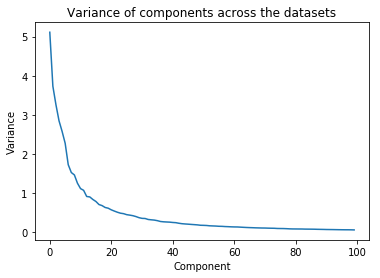

In [18]:
variance_per_component = np.var(X_reduced, axis=0)
assert len(variance_per_component == NUM_COMPONENTS), "variance_per_component = {}, NUM_COMPONENTS = {}".format(variance_per_component, NUM_COMPONENTS)
plt.plot(variance_per_component)
plt.xlabel("Component")
plt.ylabel("Variance")
plt.title("Variance of components across the datasets")